# Data Analytics and Machine Learning in Finance
##  Assignment: M&A Target Prediction Analysis

<hr style="border:2px solid teal"> </hr>

###  <span style="color:teal">Write your submission into this solution file</span> 

1. Load the data set and extract X and y using `.pop`. (1P)

In [1]:
# Your solution:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

mydata=pd.read_excel("X_and_y.xlsx")

x=mydata.copy()
y=x.pop('target_dummy')

2. Display the dimensions of the data set. (1P)

In [2]:
# Your solution:
print(mydata.shape)

(17973, 28)


3. Display the first 10 rows of the data set. (1P)

In [3]:
# Your solution:
mydata.head(n=10)

,target_dummy,year,act,at,capx,ch,che,csho,dlc,dltt,...,ppent,prstkc,pstkc,sale,seq,xint,xrd,prcc_c,prcc_f,industry
0,0,2000,68.760,108.171,8.742,0.578,0.578,0.608,26.690,58.411,...,18.658,0.000,35.147,165.542,-19.688,10.929,0.000,0.0000,0.0000,42
1,0,2000,0.261,5.987,0.823,0.005,0.005,19.147,1.928,0.012,...,3.713,0.000,0.001,1.725,-0.604,0.158,0.000,1.1250,1.1250,8
2,0,2000,1404.000,7067.000,672.000,0.000,0.000,0.000,14.000,46.000,...,1883.000,0.000,0.000,4708.000,5781.000,58.000,1273.000,0.0000,0.0000,37
3,0,2000,76.508,423.184,16.484,6.411,6.411,8.938,0.118,201.587,...,150.979,0.000,0.000,496.311,117.942,23.202,0.000,9.1250,9.7500,8
4,0,2000,148.884,190.250,10.730,0.000,112.447,329.764,0.000,0.000,...,22.222,0.000,0.000,150.491,150.852,5.845,39.380,22.5625,22.5625,48
5,0,2000,335.256,355.191,12.366,139.917,300.525,47.508,0.359,0.134,...,12.975,0.000,0.000,87.059,313.640,0.189,26.451,49.3750,19.0700,36
6,0,2000,0.000,19992.242,0.000,719.487,0.000,0.000,1968.129,2329.264,...,457.637,0.000,0.000,0.000,1480.462,752.044,0.000,23.8750,23.8750,45
7,0,2000,0.000,354.642,0.000,16.005,16.044,4.218,9.700,0.000,...,9.210,0.000,0.000,27.749,28.788,0.000,0.000,16.2500,16.2500,45
8,0,2000,13.037,38.929,1.234,0.307,0.307,5.128,1.878,18.941,...,11.068,0.999,0.000,46.201,11.833,1.792,0.000,1.4375,1.4375,20
9,0,2000,188.954,332.089,22.173,32.751,43.733,52.530,25.436,32.820,...,36.630,51.081,0.000,398.895,191.169,5.808,42.338,46.9375,46.9375,34


4. Produce summary statistics of the file. (1P)

In [4]:
# Your solution:
mydata.describe(include="all")

,target_dummy,year,act,at,capx,ch,che,csho,dlc,dltt,...,ppent,prstkc,pstkc,sale,seq,xint,xrd,prcc_c,prcc_f,industry
count,17973.000000,17973.000000,17973.000000,1.797300e+04,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,...,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000,17973.000000
mean,0.077561,2004.377900,597.696315,1.649849e+04,132.098802,473.731032,1037.329036,102.972631,1638.306935,2417.730249,...,930.586977,53.792161,4.659975,2194.985243,1712.417719,205.455292,36.250328,120.015187,119.939028,32.254048
std,0.267487,2.863942,2744.912526,1.205644e+05,771.230674,3426.481270,12944.636638,455.104133,18216.565326,18094.740821,...,4537.035571,567.200100,77.957874,10550.387774,8232.750686,1864.693598,249.621390,3163.470372,3163.471695,14.291293
min,0.000000,2000.000000,-0.168000,0.000000e+00,-330.000000,-0.134000,-0.134000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-4234.472000,-13593.000000,-0.090000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2002.000000,0.000000,5.183400e+01,0.000000,2.622000,0.474000,3.169000,0.002000,0.033000,...,1.803000,0.000000,0.000000,2.078000,15.278000,0.008000,0.000000,1.100000,1.135000,21.000000
50%,0.000000,2004.000000,14.923000,3.845650e+02,1.328000,16.166000,13.302000,16.102000,3.000000,26.804000,...,16.136000,0.000000,0.000000,66.134000,91.934000,2.077000,0.000000,9.050000,9.040000,36.000000
75%,0.000000,2007.000000,170.088000,1.899536e+03,20.666000,78.906000,84.400000,49.835000,47.500000,352.583000,...,167.502000,0.026000,0.000000,587.762000,495.600000,28.235000,2.254000,23.500000,23.390000,45.000000
max,1.000000,2009.000000,80202.000000,3.001251e+06,22658.000000,134308.969000,592643.965000,28483.267000,605462.506000,542569.195000,...,108275.000000,45000.000000,7839.000000,361143.000000,231444.000000,72187.010000,6506.000000,141600.000000,141600.000000,49.000000


5. Display categorical variables in the data set. (1P)

In [5]:
# Your solution:
cat_var=mydata.select_dtypes(include=["int"])
cat_var

,target_dummy,year,industry
0,0,2000,42
1,0,2000,8
2,0,2000,37
3,0,2000,8
4,0,2000,48
...,...,...,...
17968,1,2009,30
17969,0,2009,7
17970,1,2009,45
17971,0,2009,43


6. Create a dummy variable that is called `Dividend_Payer`. It shall take on a value of 1 if the firm pays dividends, and zero otherwise. (1P)

In [6]:
# Your solution:
def dividends(dvc):
    if pd.notna(dvc) and dvc>0:
        return 1
    else:
        return 0

mydata["Dividend_Payer"]=mydata["dvc"].apply(dividends)
print(mydata["Dividend_Payer"])

0        0
1        0
2        0
3        1
4        0
        ..
17968    0
17969    0
17970    1
17971    0
17972    0
Name: Dividend_Payer, Length: 17973, dtype: int64


7. Split the data set into train and test data set (80:20). (1P)

In [7]:
# Your solution:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)



For the following tasks, print the performance on the train set and the test set:
8. Run a logistic regression without any regularization. If the model is not converging, try setting: `max_iter=5000`. (2P)

In [8]:
# Your solution:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
mymodel1=LogisticRegression(penalty=None, max_iter=5000, random_state=42)
mymodel1.fit(x_train, y_train)
y_predict1=mymodel1.predict(x_test)

# Looking at the performance of this model:
cf_matrix1=confusion_matrix(y_test, y_predict1)
target_names=["No Deal", "Deal"]
print(classification_report(y_test, y_predict1, target_names=target_names))

score_train=mymodel1.score(x_train, y_train)
score_test=mymodel1.score(x_test, y_test)
print(score_train, score_test)

              precision    recall  f1-score   support

     No Deal       0.92      1.00      0.96      3319
        Deal       0.33      0.00      0.01       276

    accuracy                           0.92      3595
   macro avg       0.63      0.50      0.48      3595
weighted avg       0.88      0.92      0.89      3595

0.9225900681596884 0.9229485396383866


9. Run a logistic regression with elastic net with regularization that is stronger than the default setting. If the model is not converging, try setting: `max_iter=5000`. (2P)

In [9]:
# Your solution:
from sklearn.metrics import confusion_matrix

mymodel2=LogisticRegression(penalty="elasticnet", C=0.1, solver="saga", l1_ratio=0.5, max_iter=5000, random_state=42)
mymodel2.fit(x_train, y_train)
y_predict2=mymodel2.predict(x_test)

# Looking at the performance of this model:
cf_matrix2=confusion_matrix(y_test, y_predict2)
target_names=["No Deal", "Deal"]
print(classification_report(y_test, y_predict2, target_names=target_names))

score_train2=mymodel2.score(x_train, y_train)
score_test2=mymodel2.score(x_test, y_test)
print(score_train2, score_test2)

              precision    recall  f1-score   support

     No Deal       0.92      1.00      0.96      3319
        Deal       0.00      0.00      0.00       276

    accuracy                           0.92      3595
   macro avg       0.46      0.50      0.48      3595
weighted avg       0.85      0.92      0.89      3595

0.9225205174572263 0.9229485396383866


10. Run a SVC model with regularization stronger than the default setting. If the model is not converging, try setting: `max_iter=5000`. (2P)

In [10]:
# Your solution:
from sklearn.preprocessing import scale
from sklearn.svm import SVC

x_trscaled=scale(x_train)
x_ttscaled=scale(x_test)
mymodel3=SVC(C=0.1, random_state=42)
mymodel3.fit(x_trscaled, y_train)
y_predict3=mymodel3.predict(x_ttscaled)

# Looking at the performance of this model:

score_train3=mymodel3.score(x_trscaled, y_train)
score_test3=mymodel3.score(x_ttscaled, y_test)
print(score_train3, score_test3)

0.9222423146473779 0.9232267037552155


11. Run a random forest model with 300 trees and with a depth that can be termed "shallow". Hint: refer to the slides. Also, set the `random_state` to some integer of your choice. (2P)

In [11]:
# Your solution:
from sklearn.ensemble import RandomForestClassifier

mymodel4rf=RandomForestClassifier(n_estimators = 300, random_state=42, max_depth=4)
mymodel4rf.fit(x_train, y_train)

y_predict4=mymodel4rf.predict(x_test)

# Looking at the performance of this model:

score_train4=mymodel4rf.score(x_train, y_train)
score_test4=mymodel4rf.score(x_test, y_test)
print(score_train4, score_test4)

0.9222423146473779 0.9232267037552155


12. Run a gradient boosting model with the number of boosting stages that is larger than that in the default settings. (2P) 


In [12]:
# Your solution:
from sklearn.ensemble import GradientBoostingClassifier
mymodel5=GradientBoostingClassifier(n_estimators=300, random_state=42)
mymodel5.fit(x_train, y_train)
y_predict5=mymodel5.predict(x_test)

# Looking at the performance of this model:

cf_matrix5=confusion_matrix(y_test, y_predict5)
target_names=["No Deal", "Deal"]
print(classification_report(y_test, y_predict5, target_names=target_names))

score_train5=mymodel5.score(x_train, y_train)
score_test5=mymodel5.score(x_test, y_test)
print(score_train5, score_test5)

              precision    recall  f1-score   support

     No Deal       0.93      1.00      0.96      3319
        Deal       0.78      0.15      0.25       276

    accuracy                           0.93      3595
   macro avg       0.86      0.57      0.61      3595
weighted avg       0.92      0.93      0.91      3595

0.942759771873696 0.9315716272600835


13. Run a neural network model with two hidden layers. Your model should have 10 units in the first layer and 17 hidden units in the second layer. In addition, apply regularization that is weaker than the default setting, `max_iter=1000` and the remaning setttings set at default. Also, set the `random_state` to some integer of your choice. (2P)

In [13]:
# Your solution:
from sklearn.neural_network import MLPClassifier

x_trscaled2=scale(x_train)
x_ttscaled2=scale(x_test)

mymodel6=MLPClassifier(hidden_layer_sizes=(10, 17), alpha=0.000001, max_iter=1000, random_state=42)
mymodel6.fit(x_trscaled2, y_train)
y_predict6=mymodel6.predict(x_ttscaled2)

# Looking at the performance of this model:
cf_matrix6=confusion_matrix(y_test, y_predict6)
target_names=["No Deal", "Deal"]
print(classification_report(y_test, y_predict6, target_names=target_names))

score_train6=mymodel6.score(x_trscaled2, y_train)
score_test6=mymodel6.score(x_ttscaled2, y_test)
print(score_train6, score_test6)


              precision    recall  f1-score   support

     No Deal       0.93      0.99      0.96      3319
        Deal       0.33      0.04      0.08       276

    accuracy                           0.92      3595
   macro avg       0.63      0.52      0.52      3595
weighted avg       0.88      0.92      0.89      3595

0.9255807483655585 0.9198887343532685


In the following task, run grid search with 7-fold cross validation (CV), show the CV figure (heatmap), show the best parameters and briefly comment on your result.

14. Run an algorithm of your choice that has at least two hyperparameters to tune. For each of the hyperparameters, try at least two values. (6P)

Best parameters: {'C': 0.5, 'gamma': 100}
Best CV-score: 0.9237724301015441
Best estimator: SVC(C=0.5, gamma=100, max_iter=30000)


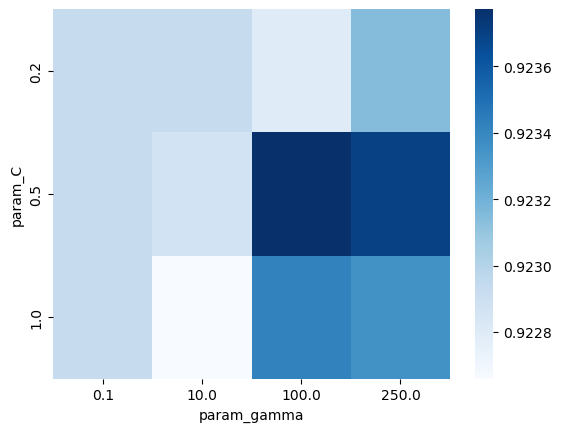

In [14]:
# Your solution:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

scaler2=StandardScaler().fit(x)
standxtrain=pd.DataFrame(scaler2.fit_transform(x_train))
standxtest=pd.DataFrame(scaler2.fit_transform(x_test))

parameters_grid={"C":[0.2, 0.5, 1.0],
                 "gamma":[0.1, 10, 100, 250]}

mygrid_search=GridSearchCV(SVC(max_iter=30000), parameters_grid, cv=7)
mygrid_search.fit(standxtrain, y_train) 

print("Best parameters: {}".format(mygrid_search.best_params_))
print("Best CV-score: {}".format(mygrid_search.best_score_))
print("Best estimator: {}".format(mygrid_search.best_estimator_))

mylastresults=pd.DataFrame(mygrid_search.cv_results_)
pivottable=pd.pivot_table(pd.DataFrame(mygrid_search.cv_results_), values="mean_test_score", index="param_C", columns="param_gamma")

picture=sns.heatmap(pivottable, cmap="Blues")

This heatmap shows two important hyperparameters of the SVC model: C on the y-axis & gamma on the x-axis. C range was from 0.2 to 1.0 and gamma range was from 0.1 to 250. 
The overall performance does not vary a lot and for all the parameters ranges from 0.9222 to 0.9229, which signals a good performance with these parameters. Darker colors signal higher performance, and the the best performance of 0.9229 can be seen with the parameters C=0.5 and gamma=250.

<hr style="border:2px solid teal"> </hr>

###  <span style="color:teal">Instructions for submitting the file:</span> 

Save the Jupyter Notebook and rename it as your StudentID.
For example, if your ID was `'1234567'`, your file would be saved as `'1234567.ipynb'`.

© Copyright. 2024. Prof. Dr. Kornelia Fabisik.

<hr style="border:2px solid gray"> </hr>